     PassengerId  Survived  Pclass  \
0              1       0.0       3   
1              2       1.0       1   
2              3       1.0       3   
3              4       1.0       1   
4              5       0.0       3   
..           ...       ...     ...   
886          887       0.0       2   
887          888       1.0       1   
888          889       0.0       3   
889          890       1.0       1   
890          891       0.0       3   

                                                  Name   Age  SibSp  Parch  \
0                              Braund, Mr. Owen Harris  22.0      1      0   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  38.0      1      0   
2                               Heikkinen, Miss. Laina  26.0      0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  35.0      1      0   
4                             Allen, Mr. William Henry  35.0      0      0   
..                                                 ...   ...    ...    ... 

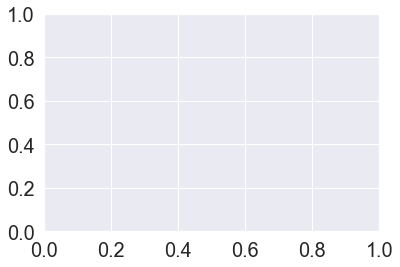

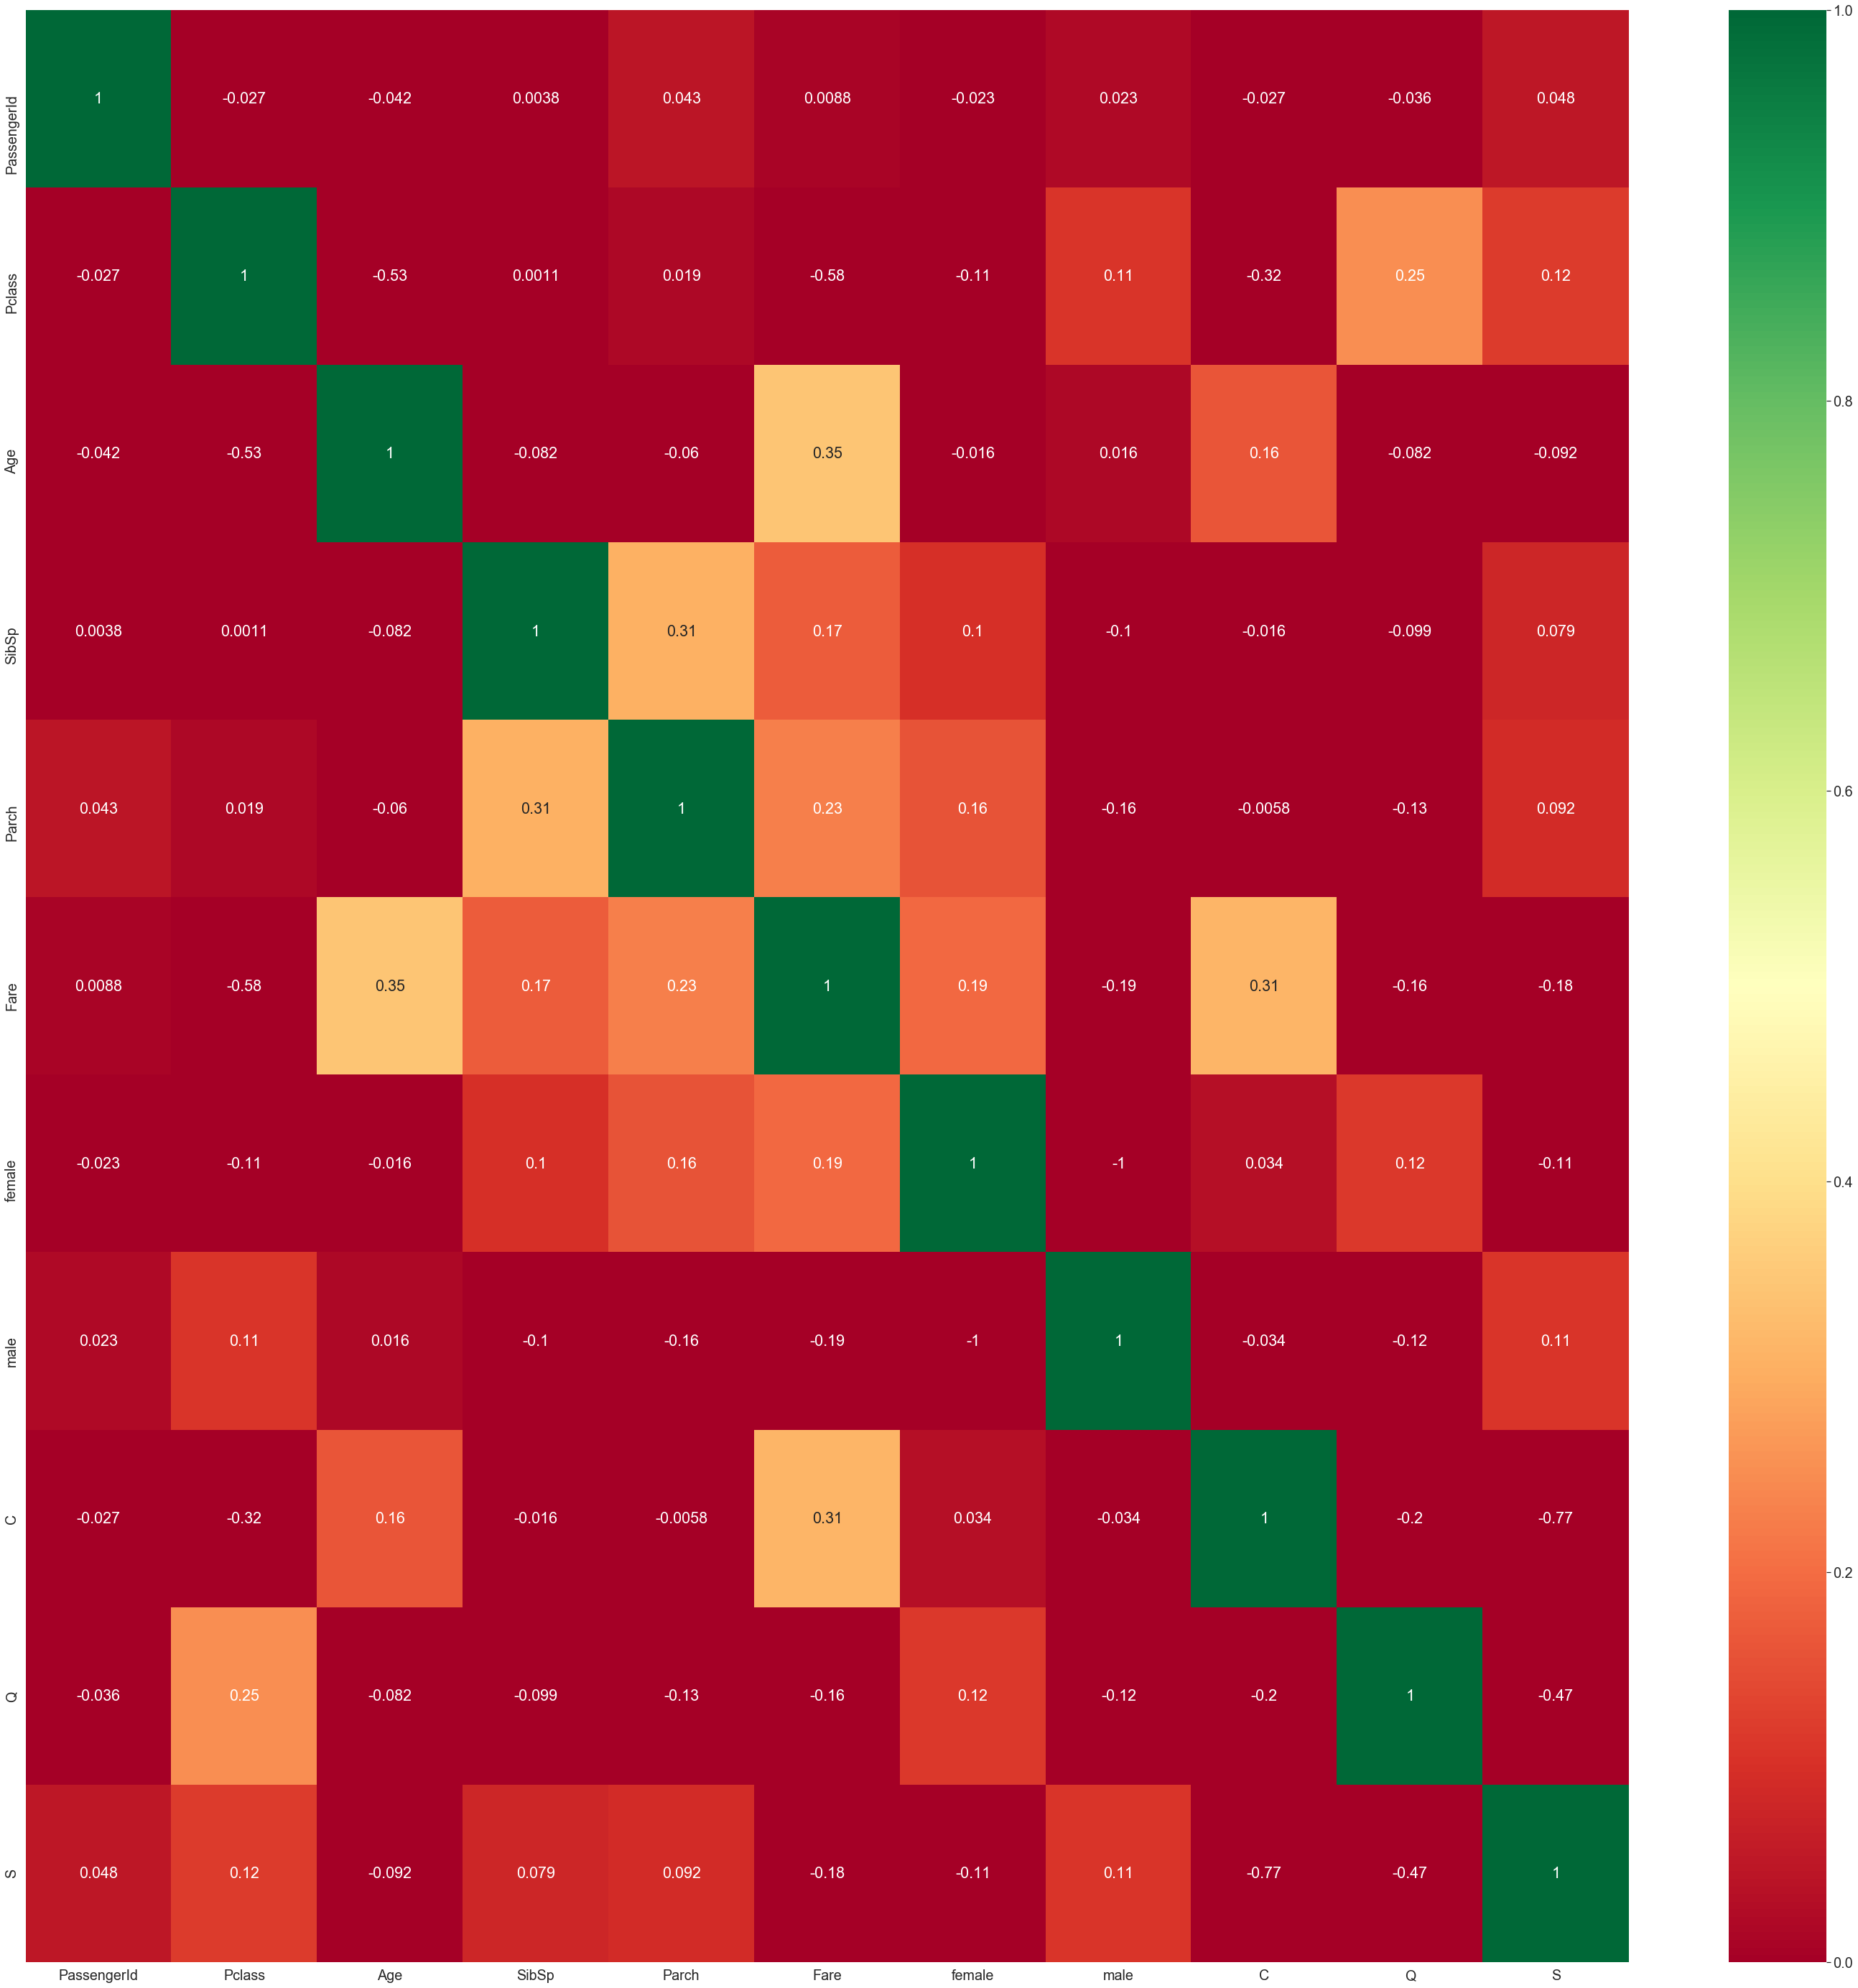

In [3]:
import seaborn as sns
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense
import sklearn as sk
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor, ExtraTreesClassifier
from sklearn.feature_selection import SelectKBest, mutual_info_regression, f_regression
from sklearn.linear_model import LinearRegression, LogisticRegression
import csv

d = pd.read_csv("train.csv")
d1 = pd.read_csv("test.csv")
#train = pd.DataFrame(data = d)
#test = pd.DataFrame(data = d1)
whole = pd.concat([d, d1], sort = False).reset_index(drop=True)


"""
age_by_pclass_sex = whole.groupby(['Sex', 'Pclass']).median()['Age']

for pclass in range(1, 4):
    for sex in ['female', 'male']:
        print('Median age of Pclass {} {}s: {}'.format(pclass, sex, age_by_pclass_sex[sex][pclass]))
print('Median age of all passengers: {}'.format(whole['Age'].median()))
"""


whole["Age"] = whole.groupby(['Sex', 'Pclass'])['Age'].apply(lambda x: x.fillna(x.median()))


whole["Embarked"] = whole["Embarked"].fillna("S")


median_fare = whole.groupby(["Pclass", "Parch", "SibSp"]).Fare.median()[3][0][0] 
whole['Fare'] = whole['Fare'].fillna(median_fare)

whole['Deck'] = whole['Cabin'].apply(lambda x: x[0].capitalize() if pd.notnull(x) else 'M')

idx = whole[whole['Deck'] == 'T'].index
whole.loc[idx, 'Deck'] = 'A'

dummy_gender = pd.get_dummies(whole["Sex"])
whole = pd.concat([whole, dummy_gender], axis = 1)
whole = whole.drop(["Sex"], axis = 1)

dummy_embarked = pd.get_dummies(whole["Embarked"])
whole = pd.concat([whole, dummy_embarked], axis = 1)
whole = whole.drop(["Embarked"], axis = 1)

whole.drop(['Cabin'], inplace=True, axis=1)

whole['Deck'] = whole['Deck'].replace(['A', 'B', 'C'], 'ABC')
whole['Deck'] = whole['Deck'].replace(['D', 'E'], 'DE')
whole['Deck'] = whole['Deck'].replace(['F', 'G'], 'FG')

def divide_df(all_data):
    # Returns divided dfs of training and test set
    return all_data.loc[:890], all_data.loc[891:].drop(['Survived'], axis=1)

train, test = divide_df(whole)

def display_missing(df):    
    for col in df.columns.tolist():          
        print('{} column missing values: {}'.format(col, df[col].isnull().sum()))
    print('\n')

dfs = [train, test]

for df in dfs:
    print('{}'.format(df))
    display_missing(df)


#Heatmap feature selection
corrmat = df.corr()
#plot heat map
sns.set(font_scale = 1.8)
ax = plt.subplot(111)
plt.figure(figsize=(50,50))
heatmap = sns.heatmap(df.corr(),annot = True,cmap="RdYlGn", vmin = 0, vmax = 1)
plt.show()
